### Import Libraries

In [1]:

# Data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# label encoder,Standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
 
# Modeling 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC

# Hyperparameter tuning
#from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
#from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval


# Validation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"F:\Tutorials\Certified program in MACHINE LEARNING and ARTIFICIAL INTELLIGENCE\Dataset_20220919\drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### Label Encoding Categorical Variable 

In [5]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [6]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [7]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [8]:
# label and feature matrix

y=data.Drug
X=data.drop(columns='Drug')
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
#Label encoding categorical data

col = ['Sex','BP','Cholesterol']
label_encoder= LabelEncoder()
X[col] = X[col].apply(label_encoder.fit_transform)


In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


### Scaling data 

In [11]:
##Scale the data
sc=MinMaxScaler()
#sc=StandardScaler()
X['Age']=sc.fit_transform(X[['Age']])
#X['Na_to_K']=sc.fit_transform(X[['Na_to_K']])
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,0.135593,0,0,0,25.355
1,0.542373,1,1,0,13.093
2,0.542373,1,1,0,10.114
3,0.220339,0,2,0,7.798
4,0.779661,0,1,0,18.043


### Split to training and testing 

In [12]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 150 records.
The testing dataset has 50 records.


### Logistic Regression 

In [13]:
modLog=LogisticRegression().fit(X_train,y_train)
ypred=modLog.predict(X_test)
err1=accuracy_score(y_test, ypred)

print("intercept: ",modLog.intercept_)
print('coefficient: ',modLog.coef_[0])
print('{} % of the test samples are corrrectly classified \n\n'.format(err1*100))


intercept:  [-24.23928266  10.50450432   3.18201365   6.86616082   3.68660387]
coefficient:  [0.29098581 0.27916057 0.58249124 0.13510334 1.73634436]
98.0 % of the test samples are corrrectly classified 




Text(0.5, 1.0, 'Confusion Matrix')

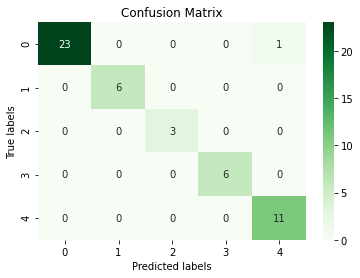

In [14]:
cf_matrix = confusion_matrix( ypred,y_test)
ax= plt.subplot()
sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="Greens")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

### KNN

Best k: 2


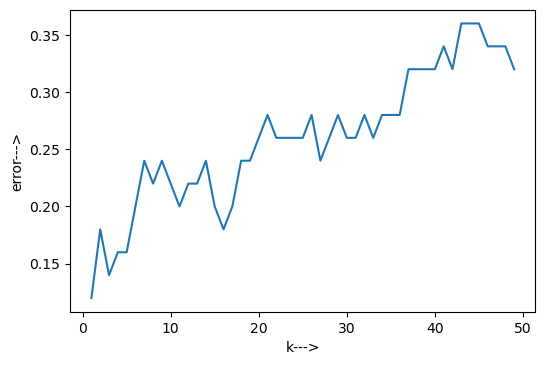

In [15]:
# Finding the best k value
err=[]
for k in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors=k)
    modelKNN=neigh.fit(X_train,y_train)
    ypred=modelKNN.predict(X_test)
    acc=accuracy_score(y_test, ypred)
    err.append(1-acc)
plt.figure(dpi=100)
plt.plot(range(1,50),err)
plt.xlabel('k--->')
plt.ylabel('error--->')

k=err.index(min(err))+1
if k==1:
    k=2
    
print('Best k:',k)

In [16]:
neigh = KNeighborsClassifier(n_neighbors=k)
modelKNN=neigh.fit(X_train,y_train)
ypred=modelKNN.predict(X_test)
err2=accuracy_score(y_test, ypred)
print('{}% of the test samples are corrrectly classified \n\n'.format(err2*100))
print(classification_report(y_test,ypred))

82.0% of the test samples are corrrectly classified 


              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        23
       drugA       0.56      0.83      0.67         6
       drugB       0.33      0.33      0.33         3
       drugC       0.67      0.67      0.67         6
       drugX       1.00      0.67      0.80        12

    accuracy                           0.82        50
   macro avg       0.70      0.70      0.69        50
weighted avg       0.85      0.82      0.82        50



Text(0.5, 1.0, 'Confusion Matrix')

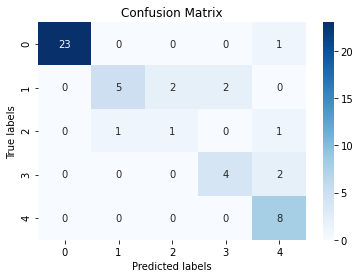

In [17]:
cf_matrix = confusion_matrix( ypred,y_test)
ax= plt.subplot()
sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="Blues")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

###  SVM

In [18]:

svmClass = SVC(kernel='linear', C=10, gamma='auto')
model4=svmClass.fit(X_train,y_train)
ypred=model4.predict(X_test)
err3=accuracy_score(y_test, ypred)
print(model4.get_params())
print('{}% of the test samples are corrrectly classified \n\n'.format(err3*100))

{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
96.0% of the test samples are corrrectly classified 




Text(0.5, 1.0, 'Confusion Matrix')

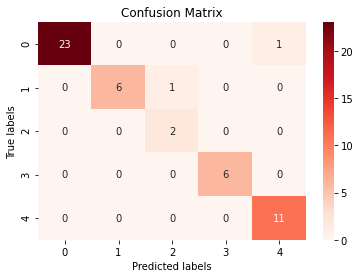

In [19]:
cf_matrix = confusion_matrix( ypred,y_test)
ax= plt.subplot()
sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="Reds")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [20]:

svmClass = SVC(kernel='rbf', C=100, gamma='auto')
model4=svmClass.fit(X_train,y_train)
ypred=model4.predict(X_test)
err3=accuracy_score(y_test, ypred)
print(model4.get_params())
print('{}% of the test samples are corrrectly classified \n\n'.format(err3*100))

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
94.0% of the test samples are corrrectly classified 




Text(0.5, 1.0, 'Confusion Matrix')

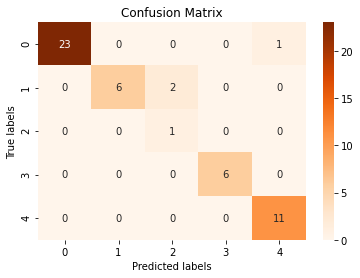

In [21]:
cf_matrix = confusion_matrix( ypred,y_test)
ax= plt.subplot()
sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="Oranges")
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [22]:

svmClass = SVC(kernel='poly', C=1000, gamma='auto')
model4=svmClass.fit(X_train,y_train)
ypred=model4.predict(X_test)
err3=accuracy_score(y_test, ypred)
print(model4.get_params())
print('{}% of the test samples are corrrectly classified \n\n'.format(err3*100))

{'C': 1000, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
96.0% of the test samples are corrrectly classified 




Text(0.5, 1.0, 'Confusion Matrix')

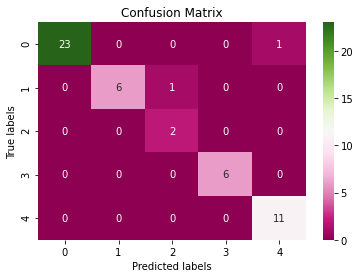

In [23]:
cf_matrix = confusion_matrix( ypred,y_test)
ax= plt.subplot()
sns.heatmap(cf_matrix,annot=True,ax=ax, cmap= 'PiYG')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')